<a href="https://colab.research.google.com/github/TesisMaestria2025/Tesis/blob/main/Metodologia_BJ.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install pmdarima

In [ ]:
!pip uninstall -y numpy scipy
!pip install numpy==1.23.5 scipy==1.10.1 --no-cache-dir

Found existing installation: numpy 2.0.2
Uninstalling numpy-2.0.2:
  Successfully uninstalled numpy-2.0.2
Found existing installation: scipy 1.14.1
Uninstalling scipy-1.14.1:
  Successfully uninstalled scipy-1.14.1
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.9/58.9 kB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 240.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.1/34.1 MB 233.1 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 2.0.5 requires numpy>=1.24.4, but you have numpy 1.23.5 which is incompatible.
albucore 0.0.23 requires numpy>=1.24.4, but you have numpy 1.23.5 which is incompatible.
treescope 0.1.9 requires numpy>=1.25.2, but you have numpy 1.23.5 which is incompatible.
pymc 5.21.1 requires numpy>=1.25.0, but you have numpy 1.23.5 which is incompatible.
cvxpy 1.6.3 r

In [ ]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import scipy.stats
import  statsmodels.graphics.tsaplots as sgt
import statsmodels.tsa.stattools as sts
import  statsmodels.tsa.seasonal
from statsmodels.tsa.seasonal import seasonal_decompose
import seaborn as sns
from statsmodels.tsa.arima_model import  ARMA
from statsmodels.tsa.arima_model import  ARIMA
from statsmodels.tsa.statespace.sarimax import  SARIMAX
from pmdarima.arima import  auto_arima
from pmdarima.arima import ADFTest
import warnings
warnings.filterwarnings("ignore")
sns.set()
from typing import Union
from tqdm import tqdm_notebook
from itertools import product
from google.colab import drive
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from pmdarima.arima import ADFTest
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error, mean_absolute_error
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose, STL
from statsmodels.stats.diagnostic import acorr_ljungbox
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.graphics.gofplots import qqplot
from statsmodels.tsa.stattools import adfuller
from tqdm import tqdm_notebook
from itertools import product
from typing import Union
import statsmodels.api as sm

In [ ]:
# Carga de unidad y datos
drive.mount('/content/drive')
Ruta_Archivo = '/content/drive/MyDrive/Ventas_Hora_V2.csv'

Mounted at /content/drive


In [ ]:
Datos=pd.read_csv(Ruta_Archivo,header=0, sep=";", decimal=".")
Datos.head()

,Fecha,Q_Ventas
0,1-6,10
1,1-7,29
2,1-8,68
3,1-9,60
4,1-10,58


In [ ]:
Datos.describe()

,Q_Ventas
count,2978.000000
mean,88.694090
std,62.929562
min,1.000000
25%,42.000000
50%,82.000000
75%,117.000000
max,348.000000


In [ ]:
Data=pd.DataFrame(Datos.iloc[:, 1])

In [ ]:
Data

,Q_Ventas
0,10
1,29
2,68
3,60
4,58
...,...
2973,117
2974,92
2975,39
2976,13


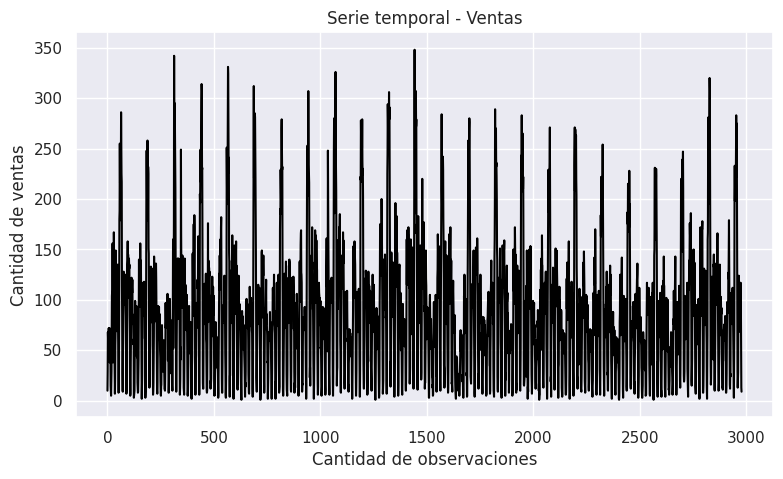

In [ ]:
plt.figure(figsize=(9, 5))
plt.plot(Data,color='black')
plt.title('Serie temporal - Ventas')
plt.xlabel('Cantidad de observaciones')
plt.ylabel('Cantidad de ventas')
plt.savefig('SerieDatos.png')
plt.show()

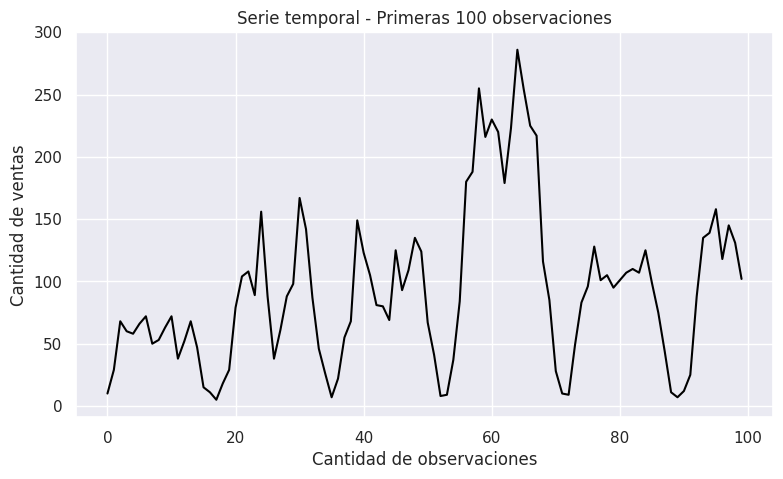

In [ ]:
plt.figure(figsize=(9, 5))
plt.plot(Data[0:100],color='black')
plt.title('Serie temporal - Primeras 100 observaciones')
plt.xlabel('Cantidad de observaciones')
plt.ylabel('Cantidad de ventas')
plt.savefig('SerieDatos.png')
plt.show()

In [ ]:
# Elementos constitutivos de la serie
Decomposition = STL(Data, period=12).fit()

<Figure size 640x480 with 0 Axes>

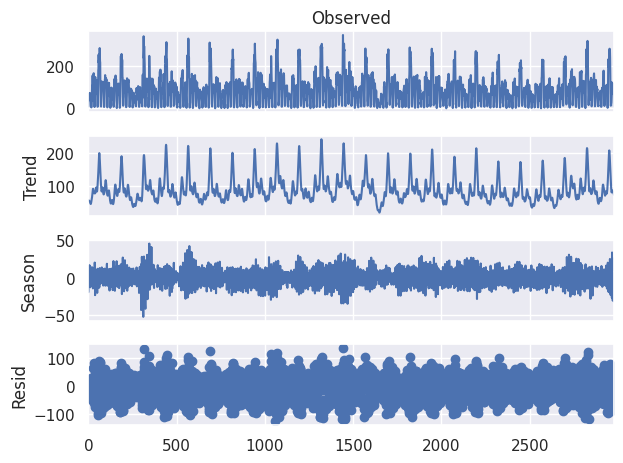

In [ ]:
plt.figure().figsize=(10,8)
Decomposition.plot()
plt.savefig('Descomposición.png')
plt.show()

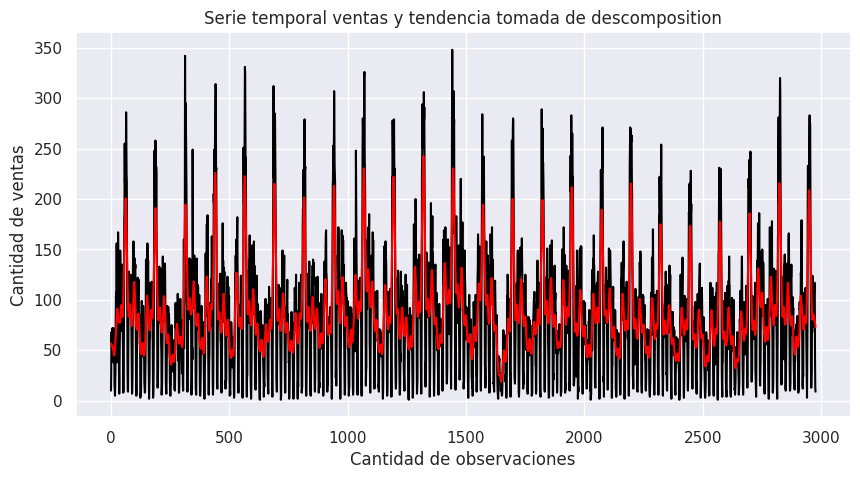

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(Data, color='black')
plt.plot(Decomposition.trend, color='red')
plt.title('Serie temporal ventas y tendencia tomada de descomposition')
plt.xlabel('Cantidad de observaciones')
plt.ylabel('Cantidad de ventas')
plt.show()

In [ ]:
# Test de evaluación de estacionariedad. Prueba de hipótesis.

ad_fuller_result = adfuller(Data)

print(f'ADF Statistic: {ad_fuller_result[0]}')
print(f'p-value: {ad_fuller_result[1]}')

ADF Statistic: -6.907883099026201
p-value: 1.2337885724622832e-09


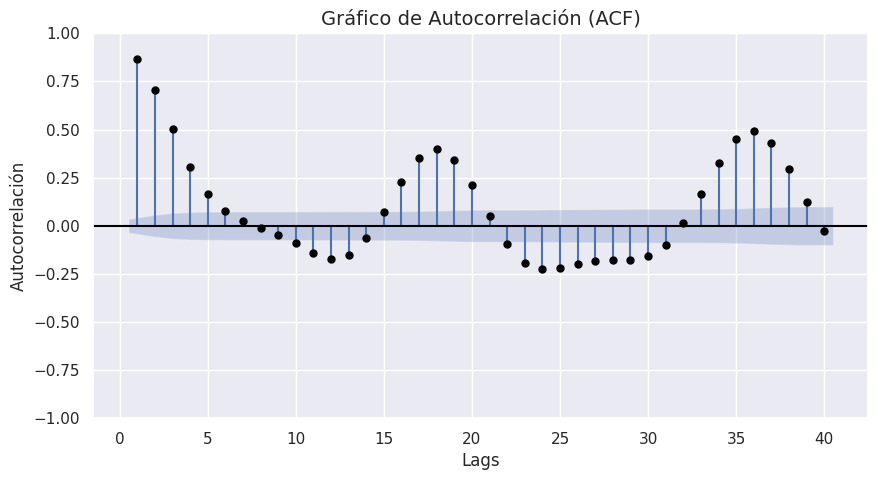

In [ ]:
# Crear el gráfico de autocorrelación
fig, ax = plt.subplots(figsize=(10, 5))  # Ajustar el tamaño del gráfico
plot_acf(Data, lags=40, zero=False, color='black', ax=ax)
ax.set_xlabel('Lags', fontsize=12)  # Título para el eje X
ax.set_ylabel('Autocorrelación', fontsize=12)  # Título para el eje Y
plt.title("Gráfico de Autocorrelación (ACF)", fontsize=14)
plt.show()

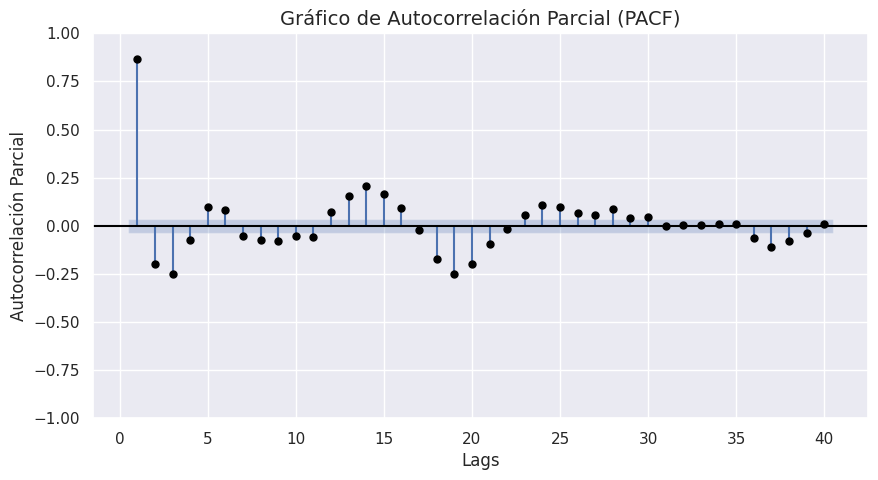

In [ ]:
# Crear el gráfico de autocorrelación parcial
fig, ax = plt.subplots(figsize=(10, 5))  # Ajustar el tamaño del gráfico
plot_pacf(Data, lags=40, zero=False, color='black', ax=ax)
ax.set_xlabel('Lags', fontsize=12)  # Título para el eje X
ax.set_ylabel('Autocorrelación Parcial', fontsize=12)  # Título para el eje Y
plt.title("Gráfico de Autocorrelación Parcial (PACF)", fontsize=14)
plt.show()

In [ ]:
len(Data)

2978

In [ ]:
# Separación de datos de entrenamiento y prueba. Se usará 90% de los datos. Esto se usa para identificar en qué observación se encuentra ya el 90%.
Largo=round(len(Data)*0.9,0)

In [ ]:
Largo

2680.0

In [ ]:
Train=Data[:2680]
Test=Data[2680:]

In [ ]:
# Validación
len(Train), len(Test)

(2680, 298)

In [ ]:
len(Train)+ len(Test)

2978

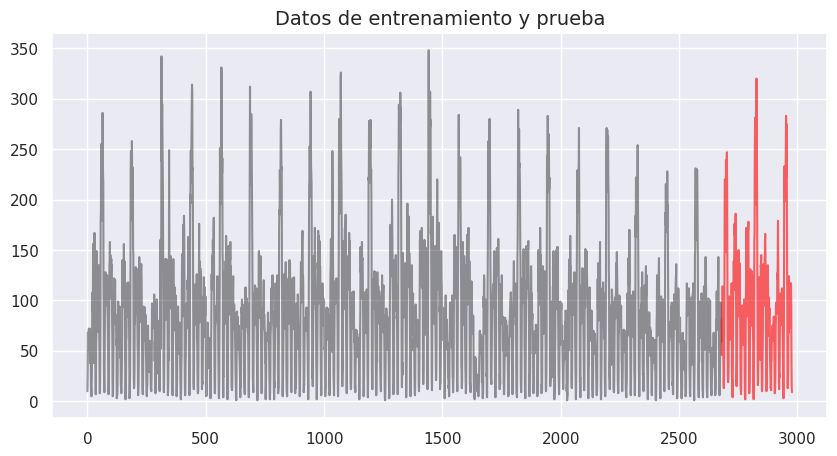

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(Train, color="black", alpha=0.4)
plt.plot(Test, color="red", alpha=0.6)
plt.title("Datos de entrenamiento y prueba", fontsize=14)
plt.show()

In [ ]:
# Busqueda mejor modelo
Mejor_Modelo = auto_arima(Data, start_p = 1, d=0, start_q = 1,
                          max_p = 2, max_q = 2, max_d=0, m =18,
                          start_P = 0, D=0, start_Q=0, max_P=2, max_D=1, max_Q=2,
                          seasonal = True,
                          trace = True,
                          error_action ='ignore',
                          suppress_warnings = True,
                          stepwise = True, n_fits=50)

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[18] intercept   : AIC=28869.523, Time=4.13 sec
 ARIMA(0,0,0)(0,0,0)[18] intercept   : AIC=33124.045, Time=0.17 sec
 ARIMA(1,0,0)(1,0,0)[18] intercept   : AIC=28478.819, Time=12.55 sec
 ARIMA(0,0,1)(0,0,1)[18] intercept   : AIC=30666.660, Time=7.10 sec
 ARIMA(0,0,0)(0,0,0)[18]             : AIC=36380.907, Time=0.07 sec
 ARIMA(1,0,0)(0,0,0)[18] intercept   : AIC=28945.036, Time=0.30 sec
 ARIMA(1,0,0)(2,0,0)[18] intercept   : AIC=28223.400, Time=36.77 sec
 ARIMA(1,0,0)(2,0,1)[18] intercept   : AIC=inf, Time=53.04 sec
 ARIMA(1,0,0)(1,0,1)[18] intercept   : AIC=inf, Time=12.47 sec
 ARIMA(0,0,0)(2,0,0)[18] intercept   : AIC=32094.760, Time=32.13 sec
 ARIMA(2,0,0)(2,0,0)[18] intercept   : AIC=28160.897, Time=42.95 sec
 ARIMA(2,0,0)(1,0,0)[18] intercept   : AIC=28474.400, Time=8.77 sec
 ARIMA(2,0,0)(2,0,1)[18] intercept   : AIC=27815.937, Time=72.62 sec
 ARIMA(2,0,0)(1,0,1)[18] intercept   : AIC=27814.145, Time=15.21 sec
 ARIMA(2,

In [ ]:
Modelo1 = SARIMAX(Train,
                order = (1, 0, 4),
                seasonal_order =(1, 0, 1, 18))

In [ ]:
Resultado = Modelo1.fit()
Resultado.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                             Q_Ventas   No. Observations:                 2680
Model:             SARIMAX(1, 0, 4)x(1, 0, [1], 18)   Log Likelihood              -12489.174
Date:                              Tue, 18 Mar 2025   AIC                          24994.348
Time:                                      19:59:05   BIC                          25041.497
Sample:                                           0   HQIC                         25011.405
                                             - 2680                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8849      0.012     73.580      0.000       0.861       0.908
ma.L1         -0.1693      0.021     -8.097      0.000      -0.210      -0.128
ma.L2          0.1189      0.018      6.448      0.000       0.083       0.155
ma.L3          0.0491      0.019      2.573      0.010       0.012       0.087
ma.L4         -0.0498      0.018     -2.701      0.007      -0.086      -0.014
ar.S.L18       0.9835      0.004    245.210      0.000       0.976       0.991
ma.S.L18      -0.8365      0.013    -63.942      0.000      -0.862      -0.811
sigma2       648.0866     10.651     60.848      0.000     627.211     668.962
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):              2674.64
Prob(Q):                              0.94   Prob(JB):                         0.00
Heteroskedasticity (H):               0.81   Skew:                             0.84
Prob(H) (two-sided):                  0.00   Kurtosis:                         7.60
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
# Predicción de los próximos 18 puntos
Predicción = Resultado.forecast(steps=298)


In [ ]:
Predicción

,predicted_mean
2680,73.481111
2681,73.310350
2682,85.237144
2683,82.201443
2684,94.733930
...,...
2973,70.497364
2974,62.987207
2975,43.001086
2976,28.017665


In [ ]:
len(Predicción)

298

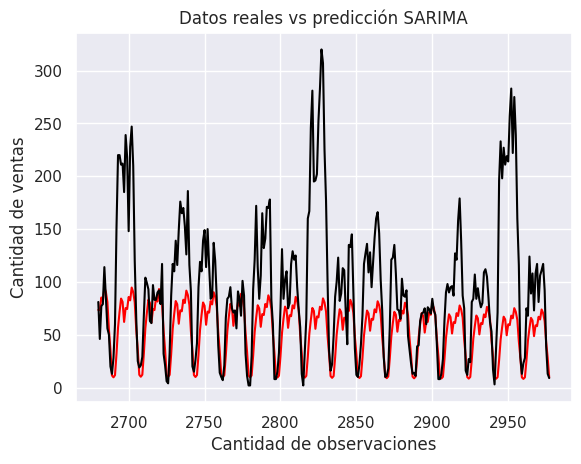

In [ ]:
plt.plot(Predicción, color='red')
plt.plot(Test, color='black')
plt.title('Datos reales vs predicción SARIMA')
plt.xlabel('Cantidad de observaciones')
plt.ylabel('Cantidad de ventas')
plt.savefig('PredicciónArima.png')
plt.show()

In [ ]:
# Ajuste para evaluación de errores.
Predicción = Resultado.forecast(steps=298).values

In [ ]:
def calculate_mse(predictions, targets):
    mse = np.mean((predictions - targets) ** 2)
    return mse

In [ ]:
MSE = calculate_mse(Predicción, Test_ints)
print(f'MSE: {MSE:.2f}')

MSE: 6635.51


In [ ]:
np.sqrt(MSE)

81.45865352099857

In [ ]:
sum(Test_ints)/len(Test_ints)

array([96.7114094])

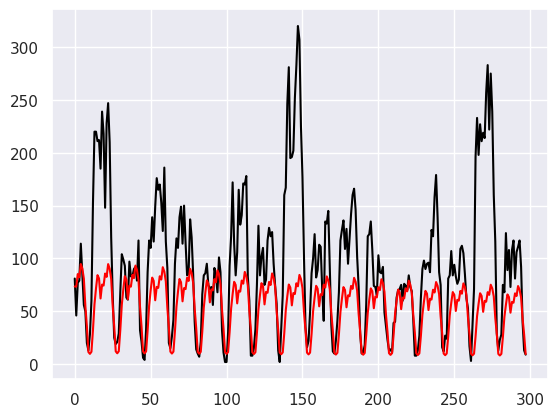

In [ ]:
plt.plot(Test_ints, color='black')
plt.plot(Predicción, color='red')



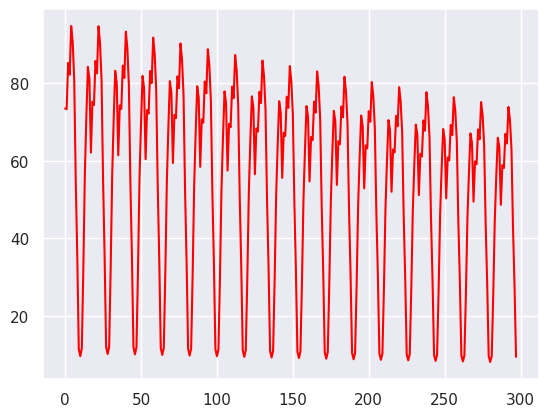

In [ ]:
plt.plot(Predicción, color='red')